# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Loading and Preparing the Data



In [76]:
# the data is Africanized
# it has many columns
# some values are missing
# some columns are not numbers

import numpy as np
import pandas as pd

# loading the csv file
df = pd.read_csv("sample_data/Tanzania_Pump-it-up_challenge_dataset_X_test_raw.csv")

# checking missing values in each column
print("missing values in each column:")
print(df.isna().sum())

# finding columns that are not numeric
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("\ncolumns that are not numeric:")
print(non_numeric_columns)

# keeping only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# filling missing values using the mean
df_numeric = df_numeric.fillna(df_numeric.mean())

# converting the data to a numpy array
data = df_numeric.values

print("\nfinal data shape for pca:")
print(data.shape)


missing values in each column:
id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_g

#### Data Handling Explanation
The dataset originally contained missing values and not numeric features,  
the not numeric columns were identified and excluded from PCA, since PCA requires numerical input. Missing values in numeric columns were imputed using the mean of each feature to preserve overall data distribution

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

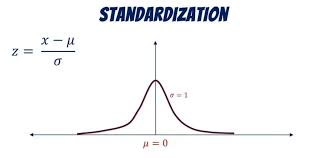


In [77]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

# calculating the mean for each column
mean = np.mean(data, axis=0)

# calculating the standard deviation for each column
std = np.std(data, axis=0)

# standardizing the data
standardized_data = (data - mean) / std

# showing the first five rows
standardized_data[:5]

array([[ 0.63782261, -0.12857104,  1.93978422,  0.18644457,  0.55259834,
        -0.05082061,  0.34093584, -0.27150389,  0.29156676,  0.75616091],
       [ 0.67738504, -0.12857104,  1.3220519 ,  0.39362623,  0.80780329,
        -0.05082061, -0.76430973, -0.37487891,  0.24683676,  0.74359821],
       [-0.93610678, -0.12857104,  1.31915854,  0.10712545,  0.23136642,
        -0.05082061, -0.12443071, -0.37487891,  0.6728368 ,  0.75406713],
       [ 0.39314417, -0.12857104, -0.56152535,  0.60618154, -1.26974626,
        -0.05082061,  3.7730142 ,  3.86349712,  0.14033675,  0.72998863],
       [ 0.59502963,  0.07056201,  0.8750278 ,  0.14326485, -1.79062149,
        -0.05082061, -0.29894317, -0.27150389, -0.26436329,  0.74359821]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [78]:
# Step 3: Calculate the Covariance Matrix

# calculating the covariance matrix from the standardized data
cov_matrix = np.cov(standardized_data, rowvar=False)

# showing the matrix shape
print("Matrix Shape: ", cov_matrix.shape, "\n")

cov_matrix

Matrix Shape:  (10, 10) 



array([[ 1.00006734e+00, -1.60134345e-02,  2.71096752e-03,
        -3.33114092e-03,  9.63276214e-03, -1.60412822e-02,
         2.60157410e-03, -6.55018739e-04, -1.60687466e-02,
        -4.59086479e-03],
       [-1.60134345e-02,  1.00006734e+00,  9.62369281e-02,
         2.77106632e-02, -7.22145052e-02,  2.29793999e-02,
        -2.88889406e-02, -2.73925510e-02,  2.86588448e-02,
         8.62422250e-02],
       [ 2.71096752e-03,  9.62369281e-02,  1.00006734e+00,
         1.48731989e-01, -4.50306041e-02,  1.33320231e-02,
        -1.77844136e-01, -1.69597682e-01,  1.32003098e-01,
         6.56824901e-01],
       [-3.33114092e-03,  2.77106632e-02,  1.48731989e-01,
         1.00006734e+00, -4.30030137e-01,  3.09810200e-02,
         2.43557764e-02,  1.48971974e-01,  9.08681994e-02,
         3.97388247e-01],
       [ 9.63276214e-03, -7.22145052e-02, -4.50306041e-02,
        -4.30030137e-01,  1.00006734e+00,  2.04856563e-03,
        -2.03093252e-01, -1.96189208e-01, -2.41251213e-02,
        -2.

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [79]:
# Step 4: Perform Eigendecomposition

# calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

eigenvalues, eigenvectors

(array([0.25916802, 0.29476014, 0.55948039, 0.82493802, 0.97443792,
        0.98326008, 1.0235027 , 1.09187017, 1.86040116, 2.12885485]),
 array([[-0.00369685,  0.00356801, -0.00949598, -0.09001388, -0.36467361,
          0.61859683, -0.68984729,  0.01015813,  0.00270952,  0.01149978],
        [-0.00486107, -0.01536377,  0.11126863, -0.06074483, -0.88777444,
         -0.08510099,  0.39566938, -0.09898574, -0.10062462, -0.10865684],
        [ 0.58291175,  0.22470806, -0.11468044,  0.45447719, -0.00706805,
          0.0093464 , -0.05212095,  0.23320126, -0.43742356, -0.37608902],
        [ 0.25389243, -0.13512269,  0.64444403, -0.25694371,  0.16186137,
         -0.02358236, -0.0981456 , -0.43406708,  0.00522464, -0.45948122],
        [-0.01872227, -0.14980217,  0.69267804,  0.1890835 ,  0.00781487,
          0.09587612,  0.06048214,  0.50538307, -0.17113336,  0.40502257],
        [ 0.02137522, -0.00097892, -0.05343558,  0.0172081 ,  0.20180976,
          0.77131816,  0.58054464, -0.14354

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [80]:
# Step 5: Sort Principal Components

# getting the indexes for sorting eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# sorting the eigenvalues using the indices
sorted_eigenvalues = eigenvalues[sorted_indices]

# sorting the eigenvectors using the same order
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvectors

array([[ 0.01149978,  0.00270952,  0.01015813, -0.68984729,  0.61859683,
        -0.36467361, -0.09001388, -0.00949598,  0.00356801, -0.00369685],
       [-0.10865684, -0.10062462, -0.09898574,  0.39566938, -0.08510099,
        -0.88777444, -0.06074483,  0.11126863, -0.01536377, -0.00486107],
       [-0.37608902, -0.43742356,  0.23320126, -0.05212095,  0.0093464 ,
        -0.00706805,  0.45447719, -0.11468044,  0.22470806,  0.58291175],
       [-0.45948122,  0.00522464, -0.43406708, -0.0981456 , -0.02358236,
         0.16186137, -0.25694371,  0.64444403, -0.13512269,  0.25389243],
       [ 0.40502257, -0.17113336,  0.50538307,  0.06048214,  0.09587612,
         0.00781487,  0.1890835 ,  0.69267804, -0.14980217, -0.01872227],
       [-0.02989683, -0.04690785, -0.14354628,  0.58054464,  0.77131816,
         0.20180976,  0.0172081 , -0.05343558, -0.00097892,  0.02137522],
       [-0.19708355,  0.59572261,  0.24088843,  0.04415488,  0.03839476,
        -0.07375525,  0.219413  , -0.11117735

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [81]:
# Step 6: Project Data onto Principal Components

# setting the number of components to keep
num_components = 2

# selecting the top principal components
principal_components = sorted_eigenvectors[:, :num_components]

# projecting the standardized data onto the new space
reduced_data = standardized_data @ principal_components

reduced_data[:5]

array([[-1.07118675, -1.08056637],
       [-0.57010013, -1.56773851],
       [-0.93124753, -1.1085847 ],
       [-2.63724672,  4.82420846],
       [-1.34554967, -0.59467241]])

#### Choice of Principal Components
Initially, I selected two principal components for visualization purposes, to make the selection principled, explained variance was later computed and used to dynamically select the minimum number of components required to retain at least 90% of the total variance


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [82]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (14850, 2)


array([[-1.07118675, -1.08056637],
       [-0.57010013, -1.56773851],
       [-0.93124753, -1.1085847 ],
       [-2.63724672,  4.82420846],
       [-1.34554967, -0.59467241]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

Text(0, 0.5, 'Principle Component 2')

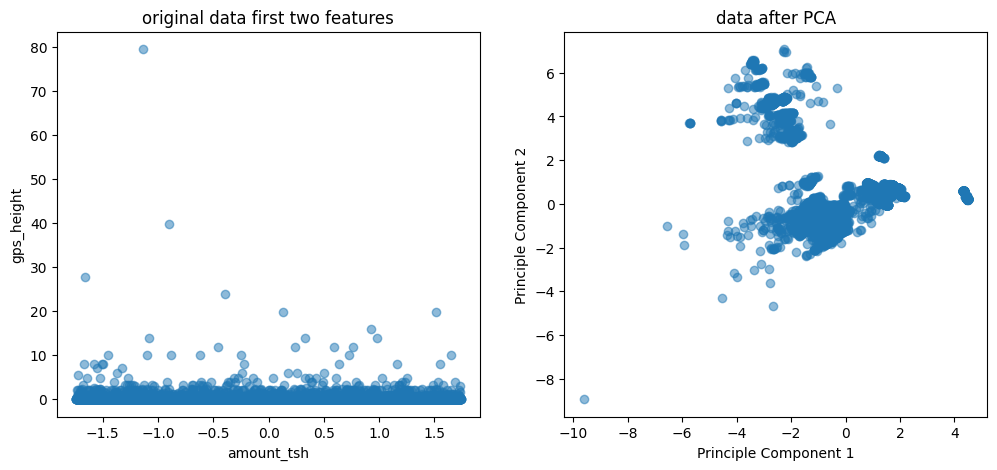

In [83]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# plotting original data using first two features
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title("original data first two features")
plt.xlabel("amount_tsh")
plt.ylabel("gps_height")

# plotting reduced data after pca
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title("data after PCA")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")

###3 PCA Visualization Interpretation
The plot before PCA shows the data in its original standardized feature space using the first two features.  
After PCA, the data is projected onto the first two principal components, where PC1 captures the highest variance and PC2 captures the next highest variance orthogonal to PC1.  
The overall structure of the data is preserved, but the axes are rotated to align with directions of maximum variance, reducing redundancy caused by correlated features.


### Task 2: dynamically select the number of principal components based on explained variance.

In [84]:
# Task 2: calculating explained variance ratio

# calculating the variance captured by each principal component
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# calculating cumulative variance to see total explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# showing the explained variance and cumulative variance
explained_variance_ratio, cumulative_variance

# selecting number of components dynamically to capture 90 percent variance
variance_threshold = 0.90
num_components_dynamic = np.argmax(cumulative_variance >= variance_threshold) + 1

# showing the number of components chosen
num_components_dynamic

# selecting principal components based on dynamic number
principal_components_dynamic = sorted_eigenvectors[:, :num_components_dynamic]

# projecting data using dynamically selected components
reduced_data_dynamic = standardized_data @ principal_components_dynamic

# printing results
print(f"number of components selected {num_components_dynamic}")
print(f"reduced data shape {reduced_data_dynamic.shape}")


number of components selected 8
reduced data shape (14850, 8)


### Task 3: Performance Optimization and Scalability

In [85]:
## Task 3: Performance Optimization and Scalability
import time

start_time = time.time()

cov_matrix_fast = np.cov(standardized_data, rowvar=False)
eigenvalues_fast, eigenvectors_fast = np.linalg.eigh(cov_matrix_fast)

end_time = time.time()

print(f"execution time for covariance and eigendecomposition: {end_time - start_time:.4f} seconds")


execution time for covariance and eigendecomposition: 0.0018 seconds
